###  Distorted-MNIST $\to$ MNIST

In [47]:
from DynGenModels.configs.registered_experiments import Config_MNIST_UNet_CondFlowMatch as Config

config = Config(NAME = 'distorted_mnist',
                DATA_SOURCE = 'distorted_mnist',
                DATA_TARGET = 'mnist',
                DATA_SPLIT_FRACS = [1.0, 0.0, 0.0],
                BATCH_SIZE = 128,
                EPOCHS = 100,
                LR = 1e-4,
                DIM_HIDDEN = 32, 
                DYNAMICS = 'ConditionalFlowMatching',
                SIGMA = 0.0,
                SOLVER ='dopri5',
                ATOL = 1e-4,
                RTOL = 1e-4,
                NUM_SAMPLING_STEPS = 100,
                DEVICE = 'cuda:0')

#...set working directory for results:

config.set_workdir(path='../../results', save_config=True)

#====================================================================================================
INFO: created directory: ../../results/distorted_mnist.ConditionalFlowMatching.Unet.2024.02.13_21h13
#====================================================================================================
+---------------------+-------------------------+
| Parameters          | Values                  |
+---------------------+-------------------------+
| NAME                | distorted_mnist         |
| DATA_SOURCE         | distorted_mnist         |
| DATA_TARGET         | mnist                   |
| DIM_INPUT           | 784                     |
| INPUT_SHAPE         | (1, 28, 28)             |
| DEVICE              | cuda:0                  |
| OPTIMIZER           | Adam                    |
| LR                  | 0.0001                  |
| WEIGHT_DECAY        | 0.0                     |
| OPTIMIZER_BETAS     | [0.9, 0.999]            |
| OPTIMIZER_EPS       | 1e-08                

In [48]:
from DynGenModels.models.dynamical_model import Model
from DynGenModels.datamodules.mnist.datasets import MNISTDataset 
from DynGenModels.datamodules.mnist.dataloader import MNISTDataloader
from DynGenModels.dynamics.cnf.condflowmatch import ConditionalFlowMatching 
from DynGenModels.models.architectures.unet import Unet 

mnist = MNISTDataset(config)

cfm = Model(dynamics = ConditionalFlowMatching(config), 
            model = Unet(config),
            dataloader = MNISTDataloader(mnist, config), 
            config = config)

cfm.train()

number of training parameters: 1075361
number of training parameters: 1075361
start training...
start training...


INFO: building dataloaders...
INFO: train/val/test split ratios: 1.0/0.0/0.0
INFO: train size: 60000, validation size: 0, testing sizes: 0


epochs:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


### generate data from trained model:

generate mnist samples by evolving fashion-mnist input

In [37]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 

pipeline = FlowMatchPipeline(trained_model=cfm, 
                             num_sampling_steps=200,
                             configs=config)

pipeline.generate_samples(input_source=mnist.source_test[:20])

INFO: neural ODE solver with dopri5 method and steps=200


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.Size([20, 1, 28, 1])
torch.Size([20, 28, 1])
torch.Size([20, 1])
torch.

### Display results

In [42]:
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage

def plot_image_evolution(pipeline, nrow=10, figsize=(3, 3)):
    plt.figure(figsize=figsize)
    step_list = [i for i in range(0, pipeline.trajectories.shape[0], 10)]
    step_list += [-1]

    print(step_list)
    res = torch.cat([pipeline.trajectories[step, :nrow] for step in step_list], dim=0)
    # grid = make_grid(res, nrow=nrow)
    grid = make_grid(res.view([-1, 1, 28, 28]).clip(0, 1), value_range=(0, 1), padding=0, nrow=nrow)
    img = ToPILImage()(grid)
    plt.imshow(img)
    plt.axis('off')

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, -1]


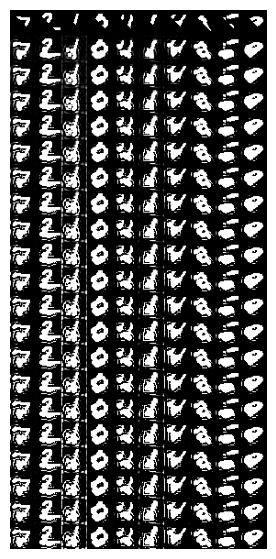

In [43]:
# from utils import plot_image_evolution
plot_image_evolution(pipeline, nrow=10, figsize=(7, 7))

In [46]:
mnist.target[0]/255.

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

### Experiment with classes

In [ ]:
import torch
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
from torchvision import transforms
from torchvision.datasets import FashionMNIST

fashion_test = FashionMNIST(root='../../data', train=False, download=True, transform=transforms.ToTensor())

pipeline = {} 
fashion_test_classes = {}

for i in range(10):
    fashion_test_classes[i] = fashion_test.data[fashion_test.targets == i].unsqueeze(1).float() / 255.0
    pipeline[i] = FlowMatchPipeline(trained_model=cfm, 
                                    num_sampling_steps=100,
                                    configs=config)
    pipeline[i].generate_samples(input_source=fashion_test_classes[i])

In [ ]:
from utils import plot_image_evolution, mnist_classifier

c = 0
plot_image_evolution(pipeline[c])
mnist_classifier(pipeline[c], plot_histogram=True)


### Out-of-distribution samples

In [1]:
import torch
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
from torchvision import transforms
from torchvision.datasets import EMNIST

emnist_test = EMNIST(root='../../data', split='letters', train=False, download=True, transform=transforms.ToTensor())
emnist_test = emnist_test.data.unsqueeze(1).float() / 255.0
pipeline_ood = FlowMatchPipeline(trained_model=cfm, 
                                    num_sampling_steps=100,
                                    configs=config)
pipeline_ood.generate_samples(input_source=emnist_test[:100])

In [ ]:
plot_image_evolution(pipeline_ood, nrow=10, figsize=(3, 3))